### Import packages

In [8]:
import numpy as np
import yaml
from gmm_mi.gmm import GMM
from gmm_mi.gmm_mi import GMM_MI
from gmm_mi.data.synthetic_data import D3 as dataset
from gmm_mi.utils.plotting import plot_gmm_contours, histogram_estimates, plot_loss_curves, plot_bias_chi2_histogram

### Calculate the true MI of the synthetic model, and plot contours

True MI: 0.168 nats


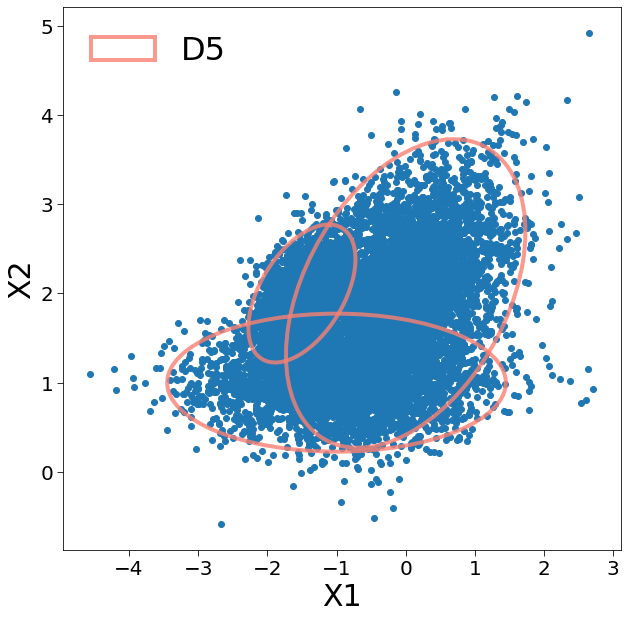

In [25]:
label = 'D5'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
print(f'True MI: {analytic:.3f} nats')
plot_gmm_contours(dataset, ls='-', label=label)

In [26]:
all_MI_estimates = np.load(f'./results/MI_{label}_501_bis.npy')[304:]
last_id = np.where(all_MI_estimates == 0)[0][0]
all_MI_estimates = all_MI_estimates[:last_id]

In [27]:
last_id

74

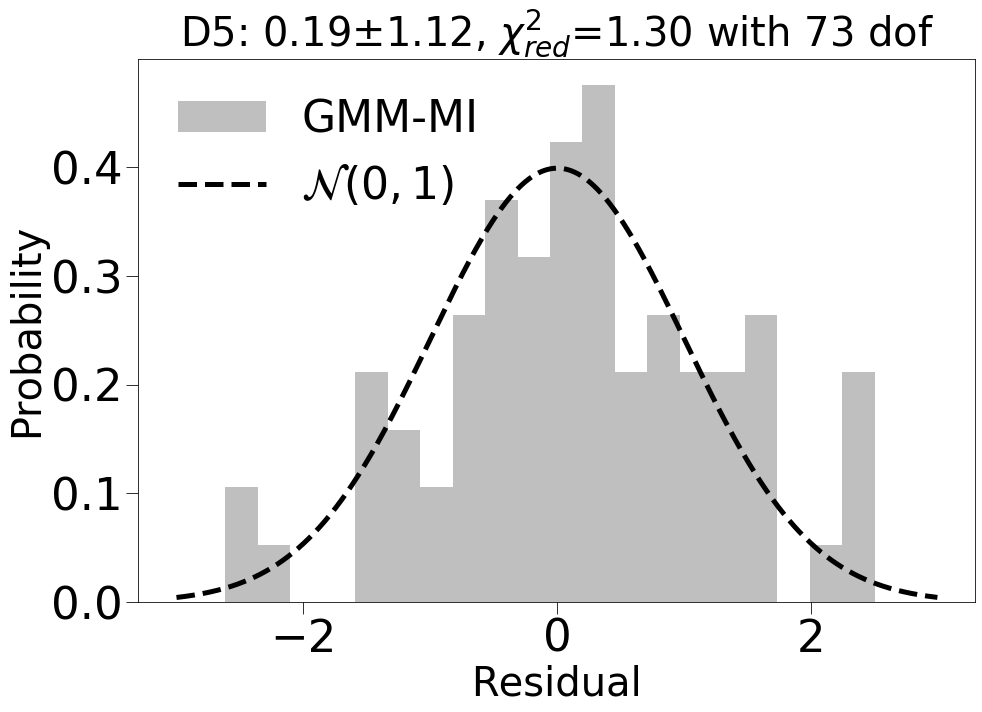

In [28]:
show_title=True
show_legend=True
hide_ylabel=False
labelfontsize=40

biases, red_chi2, df = plot_bias_chi2_histogram(all_MI_estimates, analytic=analytic, 
                                                show_title=show_title, show_legend=show_legend, 
                                                hide_ylabel=hide_ylabel, labelfontsize=labelfontsize, 
                                                ds=label)

In [81]:
red_chi2

1.2439397816243836

### Test on 500 trials

In [ ]:
N = 10000
random_states = 500
all_MI_estimates = np.zeros((random_states, 2))
save = True

# load parameters from yaml file and assign them to variables
# not the cleanest and safest way, but it should work
with open('./config_parameters.yml', 'rb') as f:
    conf = yaml.safe_load(f.read())
locals().update(conf)

# true GMM parameters
n_components = dataset.n_components 
true_weights = dataset.weights_
true_means = dataset.means_
true_covariances = dataset.covariances_

import time
init_time = time.time()

for r in range(random_states):
    # create different realisation of ground truth; note the different random_state each time
    X = GMM(n_components=n_components, weights_init=true_weights, 
                      means_init=true_means, covariances_init=true_covariances, 
                      random_state=r).sample(N)[0]
    
    MI_mean, MI_std = GMM_MI(X, n_folds=n_folds, n_inits=n_inits, init_type=init_type, reg_covar=reg_covar, 
                             tol=tol, max_iter=max_iter, bootstrap=bootstrap, n_bootstrap=n_bootstrap, 
                             MC_samples=MC_samples, fixed_components=fixed_components, 
                             fixed_components_number=n_components, select_c=select_c, patience=patience, 
                             verbose=verbose, return_lcurves=return_lcurves)   

    # print for debugging purposes
    if r % 100 == 0 and r > 0:
        print(f'{r/random_states}%') 
    
    # store results
    all_MI_estimates[r, 0] = MI_mean
    all_MI_estimates[r, 1] = MI_std

    if save:
        np.save(f'./results/MI_{label}_{random_states}.npy', all_MI_estimates)

### Evaluate MI bias

In [7]:
# load in case you saved it
#all_MI_estimates = np.load(f'./results/MI_{label}_{random_states}.npy')

In [ ]:
# todo: make plot of whole distribution, including bootstrap

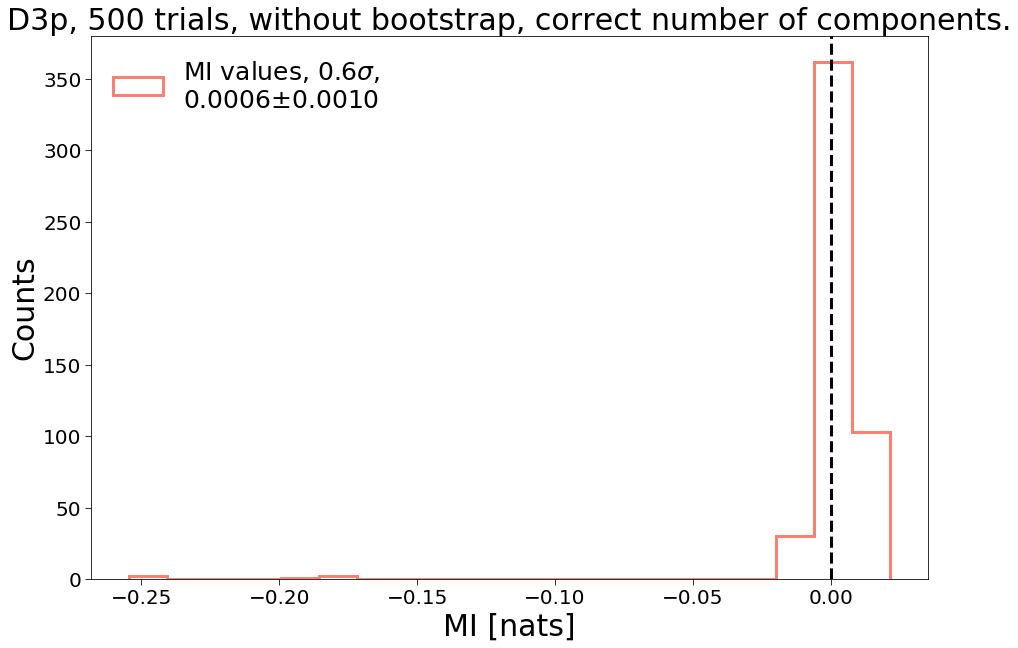

In [4]:
histogram_estimates(all_MI_estimates[:, 0] - analytic, title=f'{label}, {random_states} trials, without bootstrap, correct number of components.')

In [14]:
np.load(f'./results/MI_D5_{random_states}.npy')

array([[0.17665898, 0.00397345],
       [0.17081326, 0.00441136],
       [0.1678314 , 0.00455301],
       [0.17009181, 0.00426928],
       [0.16780329, 0.00474889],
       [0.16484251, 0.00438132],
       [0.169262  , 0.00502608],
       [0.16792369, 0.00466943],
       [0.17222516, 0.00523924],
       [0.16136842, 0.00575497],
       [0.16743245, 0.00451596],
       [0.17263082, 0.00511387],
       [0.16640378, 0.00527255],
       [0.16827227, 0.00482564],
       [0.17704661, 0.00480013],
       [0.16664991, 0.0044178 ],
       [0.16032706, 0.00437762],
       [0.17267002, 0.0053495 ],
       [0.1637992 , 0.00474174],
       [0.17467164, 0.00498624],
       [0.16982415, 0.00443704],
       [0.16948757, 0.0054531 ],
       [0.17653377, 0.00543854],
       [0.16814587, 0.00488104],
       [0.17441038, 0.00508037],
       [0.17848829, 0.00507945],
       [0.17221814, 0.00512025],
       [0.1652057 , 0.00501902],
       [0.17955239, 0.00438534],
       [0.1733424 , 0.00555036],
       [0.

In [ ]:
test = np.load(f'./results/MI_D5_{random_states}.npy')